In [1]:
import sys
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [16]:
clust_col_labels = ["protein", "fat"]
nb_clusters = 3
disp_col_labels = ["protein", "fat"]

In [17]:
data = pd.read_csv("../csv/cereals.csv", index_col=0, delimiter='\t')
if not clust_col_labels[0].startswith(':'):
    data = data.loc[:,clust_col_labels]
    print("Selected labels: " + str(clust_col_labels))
print('Read in the (' + str(data.shape[0]) + ',' + str(data.shape[1]) + ') data:')
data

Selected labels: ['protein', 'fat']
Read in the (77,2) data:


,protein,fat
name,,
100%_Bran,4,1
100%_Natural_Bran,3,5
All-Bran,4,1
All-Bran_with_Extra_Fiber,4,0
Almond_Delight,2,2
...,...,...
Triples,2,1
Trix,1,1
Wheat_Chex,3,1


In [18]:
print("\nMin-max normalizing data...", end='')
scaler = MinMaxScaler()
ndata = scaler.fit_transform(data)
ndata;


Min-max normalizing data...

In [19]:
cl = KMeans(n_clusters=nb_clusters, random_state=0, n_init='auto').fit(ndata)

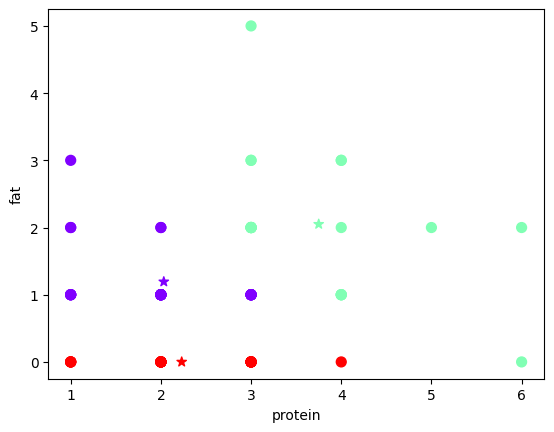

In [20]:
data.plot(kind="scatter", x=disp_col_labels[0], y=disp_col_labels[1], c=cl.labels_, marker='o', s=50, colormap=plt.cm.rainbow, colorbar=False, legend=True)
centers = scaler.inverse_transform(cl.cluster_centers_)
#centers = cl.cluster_centers_
x = data.columns.get_loc(disp_col_labels[0])
y = data.columns.get_loc(disp_col_labels[1])
plt.scatter(centers[:,x], centers[:,y], c=list(range(nb_clusters)), marker='*', s=50, cmap=plt.cm.rainbow)